# Flight 07 N2468Z - Pitch & Bank

Stall tests of BD-4C N2468Z on 21 March 2019 at St. Charles County Smartt Airport (KSET).

## Setup

In [1]:
%matplotlib inline

import sys
sys.path.append('../..')
from MglEfisPlotter import *

Load the flights from the file exported from the MGL iEFIS.

In [7]:
datafile = '../../data/IEFISBB.DAT.04'
minTimestamp = 0
maxTimestamp = 600000000

flights = createFlights(datafile, minTimestamp, maxTimestamp)
for i in range(0, len(flights)):
    print(i, ':', flights[i])

p = Plot(flights[3])
print(p.flight)

0 : Flight at 2019-03-19 17:03:36 to 2019-03-19 17:10:15,  1711 messages, timestamps 484,905,186 to 484,905,614
1 : Flight at 2019-03-20 15:10:04 to 2019-03-20 15:15:09,  1280 messages, timestamps 485,028,482 to 485,028,806
2 : Flight at 2019-03-20 15:31:45 to 2019-03-20 15:52:06,  5011 messages, timestamps 485,029,867 to 485,031,171
3 : Flight at 2019-03-19 16:38:54 to 2019-03-21 15:12:06, 21226 messages, timestamps 485,153,850 to 485,159,685
4 : Flight at 2019-03-19 16:38:54 to 2019-03-19 17:03:31,  6293 messages, timestamps 484,903,348 to 484,905,181
Flight at 2019-03-19 16:38:54 to 2019-03-21 15:12:06, 21226 messages, timestamps 485,153,850 to 485,159,685


## Graphs

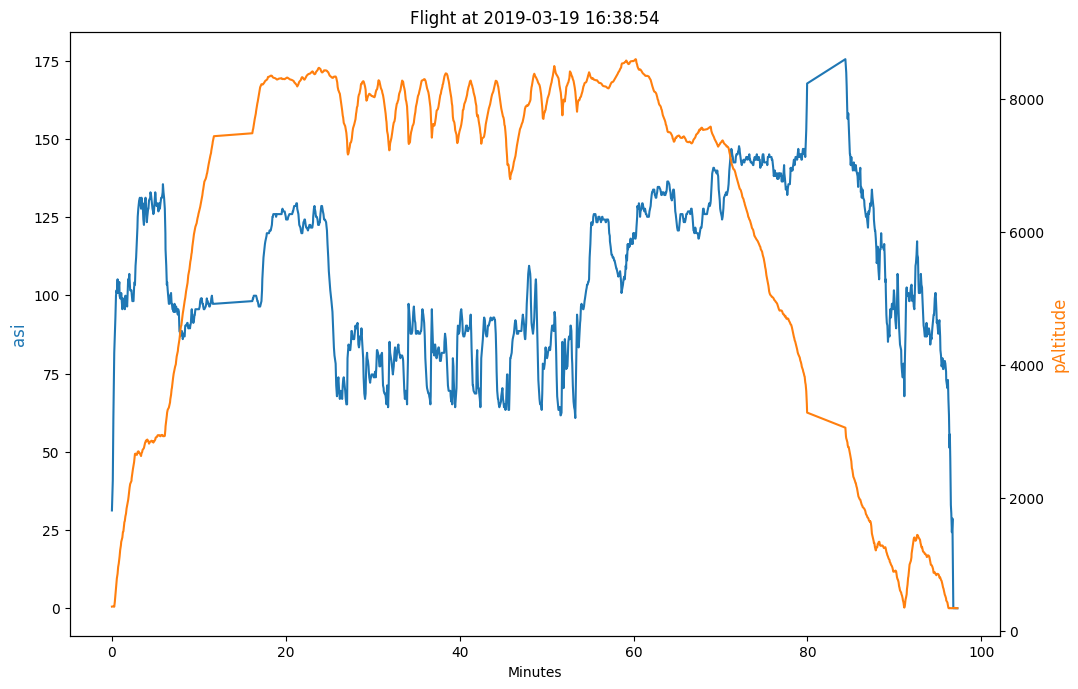

In [8]:
p.plot2(['asi', 'pAltitude'])
p.show()

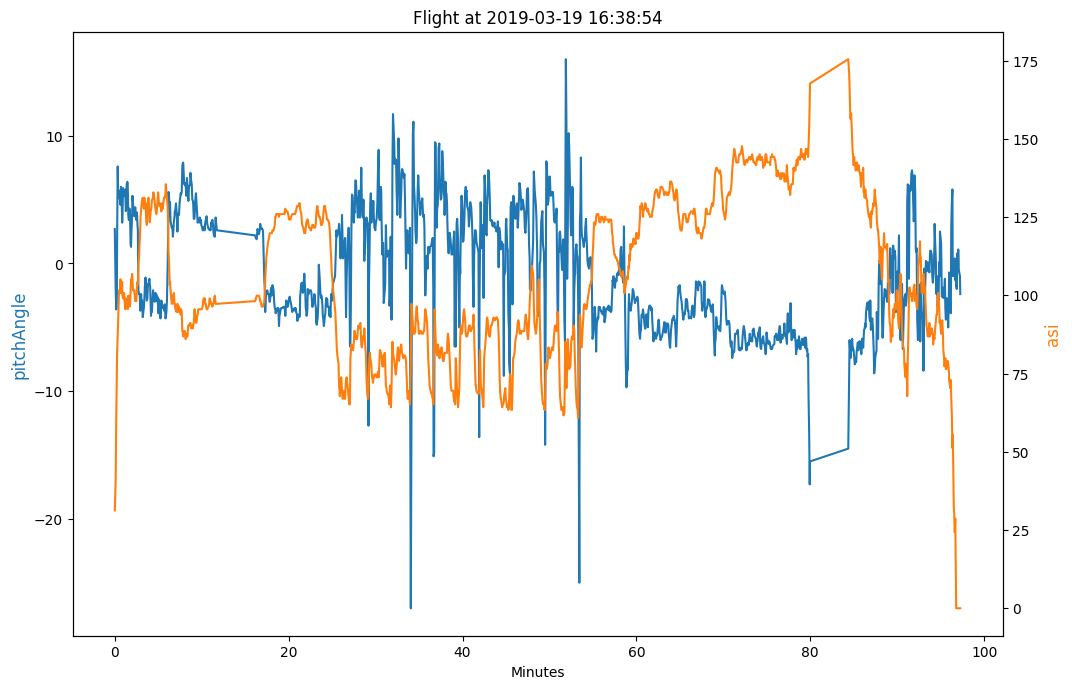

In [9]:
p.plot2(['pitchAngle', 'asi'])
p.show()

TypeError: plot() missing 1 required positional argument: 'attr'

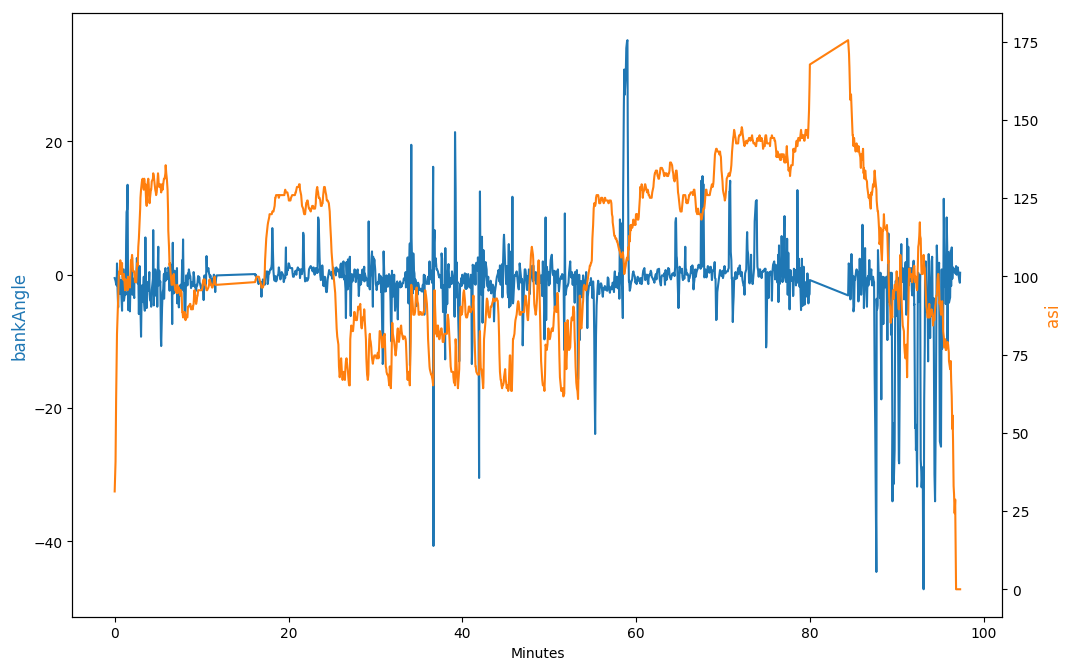

In [10]:
p.plot2(['bankAngle', 'asi'])
p.plot()